## 文本分类项目

### 项目概述
本项目的目标是对文本数据进行分类，使用朴素贝叶斯分类器（Multinomial Naive Bayes）作为模型，并通过 TF-IDF 特征提取方法对文本数据进行向量化处理。我们将按照以下步骤完成任务：

1. **加载数据**：
   - 数据文件名为 `filtered_cnews.train.txt`，每行包含类别和文本内容，用制表符 `\t` 分隔。
   - 使用 `pandas` 加载数据，并检查数据是否正确加载。

2. **划分数据集**：
   - 将数据按类别分组，并为每个类别划分训练集（4000 条）、验证集（500 条）和测试集（500 条）。
   - 合并所有类别的数据，形成完整的训练集、验证集和测试集。

3. **特征提取**：
   - 使用 `TfidfVectorizer` 对文本数据进行向量化处理，限制最大特征数为 5000。

4. **构建和训练模型**：
   - 使用朴素贝叶斯分类器（`MultinomialNB`）构建模型，并在训练集上进行训练。

5. **评估模型性能**：
   - 在验证集和测试集上评估模型性能，输出分类报告。
   - 计算宏平均（Macro Average）和微平均（Micro Average）指标。
   - 绘制混淆矩阵以可视化分类结果。

### 数据集信息
- **数据来源**：`filtered_cnews.train.txt`
- **数据格式**：
  - 每行格式为：`类别\t文本内容`
  - 类别标签为不同的字符串。
- **数据规模**：
  - 每个类别有 5000 条数据。
  - 划分比例：训练集 4000 条，验证集 500 条，测试集 500 条。

### 目标
- 构建一个文本分类模型，能够准确预测文本所属的类别。
- 通过评估指标（如精度、召回率、F1 分数）和混淆矩阵，分析模型的性能。

## 代码

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [39]:
# 设置中文字体
font = FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf')  # 替换为你的中文字体路径
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [40]:
# 检查数据是否正确加载
data = pd.read_csv(r'D:\桌面\文本分类\filtered_cnews.train.txt', header=None, names=['label', 'text'], sep='\t')
print(data.head())

  label                                               text
0    体育  马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1    体育  商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2    体育  冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3    体育  辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4    体育  揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道  谢亚龙已经被公安...


In [41]:
# 加载停用词
stopwords = set()
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    for line in f:
        stopwords.add(line.strip())

# 定义一个函数来去除停用词
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

# 应用停用词去除
data['text'] = data['text'].apply(remove_stopwords)

print("停用词已处理完成！")

停用词已处理完成！


In [42]:
# 将数据按类别分组并划分训练集、验证集和测试集
# 初始化空列表来存储每个类别的数据
train_data, val_data, test_data = [], [], []

In [43]:
# 遍历每个类别（类别标签为不同的字符串）
for label in data['label'].unique():
    # 筛选出当前类别的所有数据
    class_data = data[data['label'] == label]
    
    # 使用 train_test_split 划分数据集
    # train_size=4000, test_size=1000（剩余的再分为验证集和测试集各500）
    train, temp = train_test_split(class_data, train_size=4000, random_state=42)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)
    
    # 将划分好的数据添加到对应的列表中
    train_data.append(train)
    val_data.append(val)
    test_data.append(test)

In [44]:
# 将每个类别的数据合并成完整的训练集、验证集和测试集
train_data = pd.concat(train_data)
val_data = pd.concat(val_data)
test_data = pd.concat(test_data)

# 检查划分后的数据集大小是否符合预期
print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 24000
Validation set size: 3000
Test set size: 3000


In [45]:
# 提取特征：使用 TF-IDF 向量化文本数据
vectorizer = TfidfVectorizer(max_features=5000)  # 限制最大特征数为 5000
X_train = vectorizer.fit_transform(train_data['text'])  # 对训练集拟合并转换
X_val = vectorizer.transform(val_data['text'])         # 对验证集仅转换
X_test = vectorizer.transform(test_data['text'])       # 对测试集仅转换

In [46]:
# 提取标签
y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

In [47]:
# 构建分类模型：使用朴素贝叶斯分类器
model = MultinomialNB()

# 在训练集上训练模型
model.fit(X_train, y_train)

MultinomialNB()

In [48]:
# 在验证集上评估模型性能
val_predictions = model.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, val_predictions))

Validation Set Performance:
              precision    recall  f1-score   support

          体育       0.60      0.95      0.74       500
          家居       0.74      0.31      0.44       500
          房产       0.87      0.89      0.88       500
          教育       0.74      0.76      0.75       500
          科技       0.88      0.85      0.86       500
          财经       0.80      0.79      0.79       500

    accuracy                           0.76      3000
   macro avg       0.77      0.76      0.74      3000
weighted avg       0.77      0.76      0.74      3000



In [49]:
# 在测试集上评估模型性能
test_predictions = model.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, test_predictions))

Test Set Performance:
              precision    recall  f1-score   support

          体育       0.58      0.95      0.72       500
          家居       0.75      0.28      0.41       500
          房产       0.84      0.88      0.86       500
          教育       0.77      0.77      0.77       500
          科技       0.87      0.82      0.84       500
          财经       0.78      0.77      0.77       500

    accuracy                           0.74      3000
   macro avg       0.76      0.74      0.73      3000
weighted avg       0.76      0.74      0.73      3000



In [50]:
# 输出宏平均和微平均指标
from sklearn.metrics import precision_recall_fscore_support

# 计算宏平均和微平均指标
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_test, test_predictions, average='macro'
)
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
    y_test, test_predictions, average='micro'
)

print("\nMacro Average Metrics:")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")

print("\nMicro Average Metrics:")
print(f"Precision (Micro): {precision_micro:.4f}")
print(f"Recall (Micro): {recall_micro:.4f}")
print(f"F1 Score (Micro): {f1_micro:.4f}")


Macro Average Metrics:
Precision (Macro): 0.7641
Recall (Macro): 0.7450
F1 Score (Macro): 0.7291

Micro Average Metrics:
Precision (Micro): 0.7450
Recall (Micro): 0.7450
F1 Score (Micro): 0.7450


准确率表示模型预测为正类的样本中实际为正类的比例；
召回率表示实际为正类的样本中被模型预测为正类的比例；
F1 值是准确率和召回率的调和平均值，用于综合衡量模型的性能。
宏平均是对每个类别的指标分别计算后再求平均，更关注模型对每个类别的分类能力；
微平均是将所有类别的预测结果汇总后再计算指标，更关注模型对整体数据的分类效果。

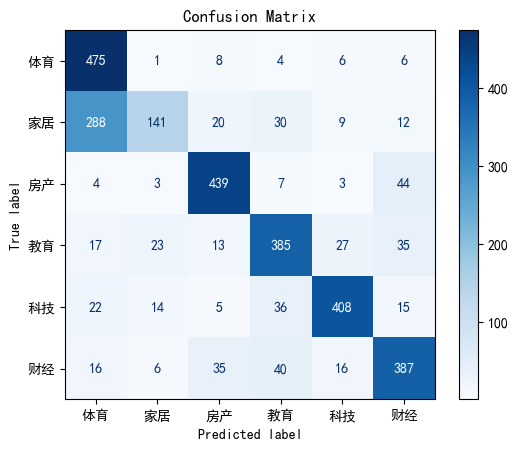

In [51]:
# 输出混淆矩阵
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

plt.show()

混淆矩阵展示了一个分类模型在不同类别上的预测结果与实际标签的对比情况。矩阵的行表示实际的类别标签（True label），列表示模型预测的类别标签（Predicted label）。每个单元格中的数字表示对应实际类别和预测类别的样本数量。
对角线上的值表示模型正确分类的样本数量。
非对角线上的值表示模型错误分类的样本数量。